In [1]:
import tweepy
import pandas as pd
import re
import os
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey = 'XXXX'
consumerSecret = 'XXXX'
accessToken = 'XXXX'
accessTokenSecret = 'XXXX'

In [3]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set the access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [4]:
#Gather 2000 Ethereum tweets filter out any retweets
search_term = '#ethereum -filter:retweets'
#Create a cursor object
tweets = tweepy.Cursor(api.search_tweets, q = search_term, lang = 'en', since = '2018-11-01', tweet_mode = 'extended').items(2000)
#Store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

In [5]:
df = pd.DataFrame(data = all_tweets, columns=['Tweets'])
df.head(10)

,Tweets
0,🚨 CHECK OUT THIS AMA 💎\n\nStarted now #AMA wit...
1,Puptent found #ethereum in a User vault at thi...
2,#Covid_19 encouraged brands to embrace all thi...
3,BTC/USD Capped Around 44411: Sally Ho's Techn...
4,The next generation of triple play services ha...
5,#Ethereum price has decreased by -3.99% in las...
6,Check out my NFT listing on OpenSea! https://t...
7,📢 Follow us &amp; Retweet this\n🟢 Monster ID:1...
8,Still foggy! JjasonJ found #ethereum in a User...
9,I dont know if there is some good people left ...


In [6]:
def clean_tweet(twt):
    twt = re.sub('#ethereum', 'ethereum', twt) #Removes '#' from ethereum
    twt = re.sub('#Ethereum', 'Ethereum', twt) #Removes '#' from Ethereum
    twt = re.sub('#[A-Za-z0-9]+', '', twt) #Removes any strings with a '#'
    twt = re.sub('\\n', '', twt) #Removes the '\n' string
    twt = re.sub('https?:\/\/\S+', '', twt) # Removes any hyperlink
    return twt

In [7]:
df['Cleaned_Tweets'] = df['Tweets'].apply(clean_tweet)
df.head(10)

,Tweets,Cleaned_Tweets
0,🚨 CHECK OUT THIS AMA 💎\n\nStarted now #AMA wit...,🚨 CHECK OUT THIS AMA 💎Started now with @dript...
1,Puptent found #ethereum in a User vault at thi...,Puptent found ethereum in a User vault at this...
2,#Covid_19 encouraged brands to embrace all thi...,_19 encouraged brands to embrace all things di...
3,BTC/USD Capped Around 44411: Sally Ho's Techn...,BTC/USD Capped Around 44411: Sally Ho's Techn...
4,The next generation of triple play services ha...,The next generation of triple play services ha...
5,#Ethereum price has decreased by -3.99% in las...,Ethereum price has decreased by -3.99% in last...
6,Check out my NFT listing on OpenSea! https://t...,Check out my NFT listing on OpenSea! ...
7,📢 Follow us &amp; Retweet this\n🟢 Monster ID:1...,📢 Follow us &amp; Retweet this🟢 Monster ID:199...
8,Still foggy! JjasonJ found #ethereum in a User...,Still foggy! JjasonJ found ethereum in a User ...
9,I dont know if there is some good people left ...,I dont know if there is some good people left ...


In [8]:
#Create a function to get subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [9]:
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,🚨 CHECK OUT THIS AMA 💎\n\nStarted now #AMA wit...,🚨 CHECK OUT THIS AMA 💎Started now with @dript...,0.000000,0.000000
1,Puptent found #ethereum in a User vault at thi...,Puptent found ethereum in a User vault at this...,1.000000,1.000000
2,#Covid_19 encouraged brands to embrace all thi...,_19 encouraged brands to embrace all things di...,0.255303,0.034091
3,BTC/USD Capped Around 44411: Sally Ho's Techn...,BTC/USD Capped Around 44411: Sally Ho's Techn...,0.100000,0.000000
4,The next generation of triple play services ha...,The next generation of triple play services ha...,0.000000,0.000000


In [10]:
#Create a fundtion to get sentiment
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [11]:
#Create a column Sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,🚨 CHECK OUT THIS AMA 💎\n\nStarted now #AMA wit...,🚨 CHECK OUT THIS AMA 💎Started now with @dript...,0.000000,0.000000,Neutral
1,Puptent found #ethereum in a User vault at thi...,Puptent found ethereum in a User vault at this...,1.000000,1.000000,Positive
2,#Covid_19 encouraged brands to embrace all thi...,_19 encouraged brands to embrace all things di...,0.255303,0.034091,Positive
3,BTC/USD Capped Around 44411: Sally Ho's Techn...,BTC/USD Capped Around 44411: Sally Ho's Techn...,0.100000,0.000000,Neutral
4,The next generation of triple play services ha...,The next generation of triple play services ha...,0.000000,0.000000,Neutral


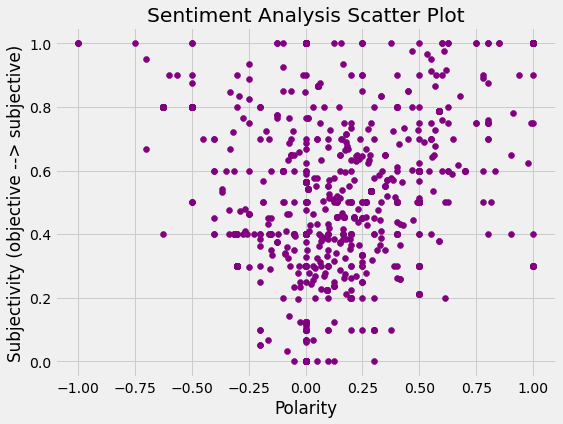

In [12]:
#Create a scatter plot that show the subjectivity and polarity
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'], df['Subjectivity'], color = 'purple')
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective --> subjective)')
plt.show()

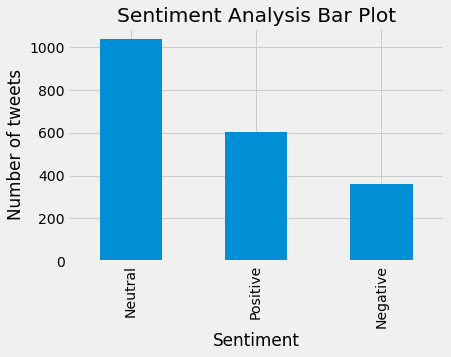

In [13]:
#Create a barchart to show the count of positive, neutral and negative sentiment
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.title("Sentiment Analysis Bar Plot")
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

### The majority of tweets are neural and positive towards Ethereum and less than 400 tweets are negative